In [17]:
import os
import matplotlib.pyplot as plt
def audio_files_histogram(folder_path):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    audio_files_count = []
    subfolder_names = []
    for subfolder in subfolders:
        count = 0
        for file in os.listdir(subfolder):
            if file.endswith('.mp3') or file.endswith('.wav'):
                count += 1
        audio_files_count.append(count)
        subfolder_names.append(os.path.basename(subfolder))
    plt.figure(figsize=(14, 5))
    plt.bar(subfolder_names, audio_files_count)
    plt.title('Number of Audio Files in Each Subfolder')
    plt.xlabel('Subfolder')
    plt.ylabel('Number of Audio Files')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()
    print(f'Total number of audio files in the entire folder: {sum(audio_files_count)}')
    print(f'Average number of audio files in the entire folder: {sum(audio_files_count)/len(audio_files_count)}')

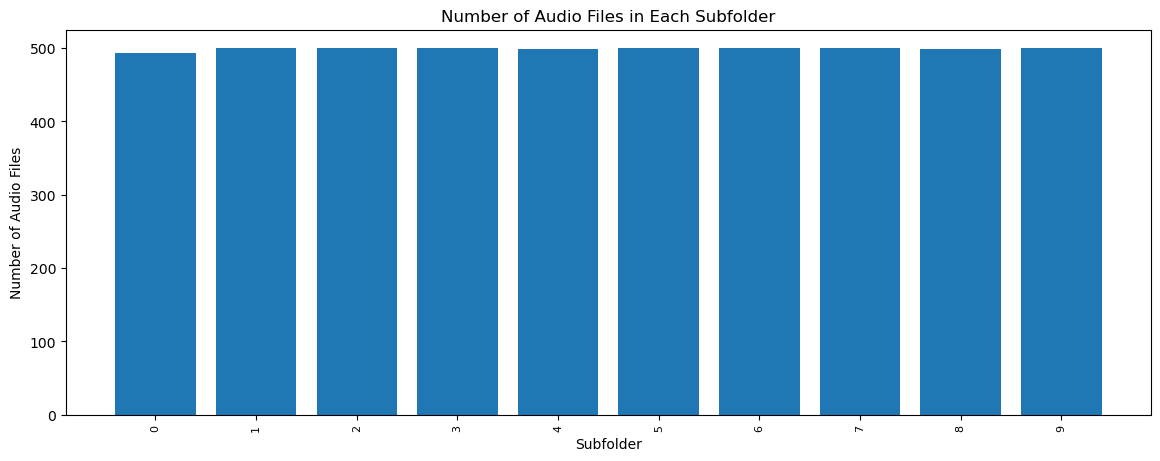

Total number of audio files in the entire folder: 4991
Average number of audio files in the entire folder: 499.1


In [18]:
audio_files_histogram("Numbers")

In [19]:
import os
import pandas as pd
from tabulate import tabulate

pd.set_option('display.max_rows', None)

def audio_files_table(folder_path):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    audio_files_count = []
    subfolder_names = []
    for subfolder in subfolders:
        count = 0
        for file in os.listdir(subfolder):
            if file.endswith('.mp3') or file.endswith('.wav'):
                count += 1
        audio_files_count.append(count)
        subfolder_names.append(os.path.basename(subfolder))
    data = {'Subfolder': subfolder_names, 'Number of Audio Files': audio_files_count}
    df = pd.DataFrame(data)
    df['Subfolder'] = df['Subfolder'].str.extract('(\d+)').astype(int)  # Extract and convert the numerical part of subfolder names
    df = df.sort_values(by='Subfolder', ascending=True)  # Sort ascending by subfolder numerical values
    df['Subfolder'] = 'Subfolder ' + df['Subfolder'].astype(str)  # Add 'Subfolder' prefix to subfolder names

    # Format the output using tabulate
    table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)

    print("Audio Files Summary")
    print("-------------------")
    print(table)


In [20]:
audio_files_table("Numbers")

Audio Files Summary
-------------------
╒═════════════╤═════════════════════════╕
│ Subfolder   │   Number of Audio Files │
╞═════════════╪═════════════════════════╡
│ Subfolder 0 │                     493 │
├─────────────┼─────────────────────────┤
│ Subfolder 1 │                     500 │
├─────────────┼─────────────────────────┤
│ Subfolder 2 │                     500 │
├─────────────┼─────────────────────────┤
│ Subfolder 3 │                     500 │
├─────────────┼─────────────────────────┤
│ Subfolder 4 │                     499 │
├─────────────┼─────────────────────────┤
│ Subfolder 5 │                     500 │
├─────────────┼─────────────────────────┤
│ Subfolder 6 │                     500 │
├─────────────┼─────────────────────────┤
│ Subfolder 7 │                     500 │
├─────────────┼─────────────────────────┤
│ Subfolder 8 │                     499 │
├─────────────┼─────────────────────────┤
│ Subfolder 9 │                     500 │
╘═════════════╧═════════════════════

In [21]:
import os
import librosa
import numpy as np
import soundfile as sf

# Function to perform data augmentation on a single audio file
def augment_audio(file_path, output_dir):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)
    
    # Data augmentation techniques
    augmented_audios = []
    
    # Add noise
    noise = np.random.randn(len(audio))
    augmented_audios.append(audio + 0.05 * noise)
    
    # Pitch shifting
    n_steps = 2
    pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)
    augmented_audios.append(pitch_shifted)
    
    # Get the subfolder labels from the original file's path
    subfolder = os.path.relpath(os.path.dirname(file_path), root_directory)
    output_subfolder = os.path.join(output_dir, subfolder)
    
    # Save augmented audio files in the corresponding subfolder
    file_name = os.path.basename(file_path)
    file_name = os.path.splitext(file_name)[0]  # Remove file extension
    for i, augmented_audio in enumerate(augmented_audios):
        output_path = os.path.join(output_subfolder, f"{file_name}_augmented_{i}.wav")
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        sf.write(output_path, augmented_audio, sr, 'PCM_16')
        print(f"Saved augmented audio: {output_path}")

# Main function to traverse through subfolders and perform data augmentation
def augment_audio_files(root_dir, output_dir):
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                augment_audio(file_path, output_dir)

# Example usage
root_directory = "Numbers"
output_directory = "Arg Numbers"

augment_audio_files(root_directory, output_directory)


Saved augmented audio: Arg Numbers\0\S01.01.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.01.01_augmented_1.wav
Saved augmented audio: Arg Numbers\0\S01.02.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.02.01_augmented_1.wav
Saved augmented audio: Arg Numbers\0\S01.03.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.03.01_augmented_1.wav
Saved augmented audio: Arg Numbers\0\S01.04.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.04.01_augmented_1.wav
Saved augmented audio: Arg Numbers\0\S01.05.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.05.01_augmented_1.wav
Saved augmented audio: Arg Numbers\0\S01.06.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.06.01_augmented_1.wav
Saved augmented audio: Arg Numbers\0\S01.07.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.07.01_augmented_1.wav
Saved augmented audio: Arg Numbers\0\S01.08.01_augmented_0.wav
Saved augmented audio: Arg Numbers\0\S01.08.01_augmente